In [2]:
import numpy as np

import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import string
import mplcursors
import collections
import sklearn.cluster
import os
from tqdm import tqdm_notebook
#%matplotlib inline
#%matplotlib notebook
#%matplotlib notebook

In [2]:
# NEW IMPLEMENTATION

import math

def get_intersections(hist1, hist2):
    len1 = len(hist1)
    len2 = len(hist2)
    intersections = []
    i = 0
    j = 0

    while i < len1 and j < len2:
        if hist1[i][0] < hist2[j][0]:
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            intersections.append((hist1[i][0], hist1[i][1], hist2[j][1]))
            i += 1
            j += 1
        elif hist1[i][0] > hist2[j][0]:
            j += 1
            
    return intersections

def get_union_inds(hist1, hist2):
    len1 = len(hist1)
    len2 = len(hist2)
    union = []
    i = 0
    j = 0

    while i < len1 or j < len2:
        if i >= len1:
            union.append(hist2[j][0])
            j += 1
        elif j >= len2:
            union.append(hist1[i][0])
            i += 1
        elif hist1[i][0] < hist2[j][0]:
            union.append(hist1[i][0])
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            union.append(hist1[i][0])
            i += 1
            j += 1
        elif hist1[i][0] > hist2[j][0]:
            union.append(hist2[j][0])
            j += 1
            
    return union


def jaccard_metric(hist1, hist2, hist_len=None):
    intersections = get_intersections(hist1, hist2)

    metric = 0

    for ind, v1, v2 in intersections:
        mx = max(v1, v2)
        mn = min(v1, v2)
        metric += mn / mx

    len_intersections = len(intersections)

    if (len_intersections != 0):
        metric = metric / len(intersections)
    else:
        metric = 0

    return 1 - metric

def canberra_metric(hist1, hist2, hist_len=None):
    metric = 0
    i = 0
    j = 0
    n = len(hist1)
    m = len(hist2)
    
    union_len = 0
    
    while i < n or j < m:
        if i >= n:
            metric += abs(hist2[j][1]) / abs(hist2[j][1]) # 1
            j += 1
        elif j >= m:
            metric += abs(hist1[i][1]) / abs(hist1[i][1]) # 1
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            metric += abs(hist1[i][1] - hist2[j][1]) / (abs(hist1[i][1]) + abs(hist2[j][1]))
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            metric += abs(hist1[i][1]) / abs(hist1[i][1]) # 1
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            metric += abs(hist2[j][1]) / abs(hist2[j][1]) # 1
            j += 1
        
        #union_len += 1
            
    union_len = len(get_union_inds(hist1, hist2))
    if union_len == 0:
        return 1
    
    return metric / union_len


def canberra_metric_optimized(hist1, hist2, hist_len=None):
    metric = 0
    i = 0
    j = 0
    n = len(hist1)
    m = len(hist2)
    
    union_len = 0
    
    while i < n or j < m:
        if i >= n:
            metric += 1.0
            j += 1
        elif j >= m:
            metric += 1.0
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            metric += abs(hist1[i][1] - hist2[j][1]) / (abs(hist1[i][1]) + abs(hist2[j][1]))
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            metric += 1.0
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            metric += 1.0
            j += 1
        
        union_len += 1
            
    #union_len = len(get_union_inds(hist1, hist2))
    if union_len == 0:
        return 1
    
    return metric / union_len



'''
def pearsons_correlation(hist1, hist2, hist_len):
    #hist_len = hist_len_3gram
    union_len = len(get_union_inds(hist1, hist2))
    
    top = 0
    left = 0
    right = 0
    
    n = len(hist1)
    m = len(hist2)
    
    i = 0
    j = 0
    
    while i < n or j < m:
        if i >= n:
            top += (- 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (- 1/hist_len) ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            j += 1
        elif j >= m:
            top += (hist1[i][1] - 1/hist_len) * (- 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (- 1/hist_len) ** 2
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            top += (hist1[i][1] - 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            top += (hist1[i][1] - 1/hist_len) * (- 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (- 1/hist_len) ** 2
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            top += (- 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (- 1/hist_len) ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            j += 1

    bottom = math.sqrt(left * right)
    return 1 - top / bottom
'''


def cos_distance(hist1, hist2, hist_len=None):
    intersections = get_intersections(hist1, hist2)

    top = 0

    for ind, v1, v2 in intersections:
        top += v1 * v2
        
    bottom1 = (sum([pair[1] ** 2 for pair in hist1]))
    bottom2 = (sum([pair[1] ** 2 for pair in hist2]))
    
    #print(top)
    #print(bottom1)
    #print(bottom2)
    
    return 1 - abs(top / np.sqrt(bottom1 * bottom2))
    

def pearsons_correlation_mean(hist1, hist2, hist_len):
    union_len = len(get_union_inds(hist1, hist2))
    
    top = 0
    left = 0
    right = 0
    
    n = len(hist1)
    m = len(hist2)
    
    mean1 = sum([pair[1] for pair in hist1]) / hist_len
    mean2 = sum([pair[1] for pair in hist2]) / hist_len
    
    i = 0
    j = 0
    
    while i < n or j < m:
        if i >= n:
            top += (- mean1) * (hist2[j][1] - mean2)
            left += (- mean1) ** 2
            right += (hist2[j][1] - mean2) ** 2
            j += 1
        elif j >= m:
            top += (hist1[i][1] - mean1) * (- mean2)
            left += (hist1[i][1] - mean1)  ** 2
            right += (- mean2) ** 2
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            top += (hist1[i][1] - mean1) * (hist2[j][1] - mean2)
            left += (hist1[i][1] - mean1)  ** 2
            right += (hist2[j][1] - mean2) ** 2
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            top += (hist1[i][1] - mean1) * (- mean2)
            left += (hist1[i][1] - mean1)  ** 2
            right += (- mean2) ** 2
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            top += (- mean1) * (hist2[j][1] - mean2)
            left += (- mean1) ** 2
            right += (hist2[j][1] - mean2) ** 2
            j += 1

    bottom = math.sqrt(left * right)
    return 1 - top / bottom
    

def get_dists(hists, dist_metric, hist_len):
    #hist_len = len(hists[0])
    
    #n = len(hists)
    dists = []
    
    for hist1 in tqdm_notebook(hists):
        cur_dists = []

        for hist2 in hists:
            distance = dist_metric(hist1, hist2, hist_len)
            
            cur_dists.append(distance)

        dists.append(cur_dists)
        
    return dists


def get_dists_optimized(hists, dist_metric, hist_len):
    #hist_len = len(hists[0])
    
    n = len(hists)
    #dists = [[0.0 for i in range(n)] for j in range(n)]
    dists = np.zeros((n, n))
    
    for i in tqdm_notebook(range(n)):
        for j in range(n):
            if i <= j:
                break
                
            distance = dist_metric(hists[i], hists[j], hist_len)
            dists[i][j] = distance
            dists[j][i] = distance
        
    return dists

In [3]:
RESULTS_ALL_LABELED_TUFANO = "/Volumes/Seagate/Alina/result_for_all_labeled_tufano"

In [4]:
all_dirs = [os.fsdecode(el) for el in os.listdir(RESULTS_ALL_LABELED_TUFANO) 
               if os.path.isdir(RESULTS_ALL_LABELED_TUFANO + "/" + os.fsdecode(el))]
all_dirs = sorted(all_dirs, key=lambda s: int(s.split(" ")[0])) 
len(all_dirs)

632

In [5]:
TUFANO_DATASET_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/CodeDiffEditScripts/TufanoDataset"

unique_label_to_changes = collections.defaultdict(list)
from_change_to_unique_label = collections.defaultdict(list)

num_multiple = 0

for double_num in tqdm_notebook(all_dirs):
    change_id = double_num.split(" ")[0]
    label_file = open(TUFANO_DATASET_PATH + "/" + change_id + "/" + "label.txt")
    labels = label_file.read().split(",")
    label = ""
        
    if len(labels) > 1:
        num_multiple += 1
        final_label_file = open(TUFANO_DATASET_PATH + "/" + change_id + "/" + "final_label.txt")
        final_label = final_label_file.read()
        label = final_label
        final_label_file.close()
        #if not os.path.exists(TUFANO_DATASET_PATH + "/" + change_id + "/" + "final_label.txt"):
        #    print(double_num)
    else:
        label = labels[0]
    
    #print(double_num, label)
        
    if label != "" and label != 'unclear':
        unique_label_to_changes[label].append(change_id)
        from_change_to_unique_label[change_id].append(label)
    
    label_file.close()
    
print(num_multiple)


42


In [6]:
print(len(from_change_to_unique_label))
print("NUM CLASSES:", len(unique_label_to_changes))

627
NUM CLASSES: 58


In [7]:
sorted(list(unique_label_to_changes))

['Abstract an existing method using the abstract keyword',
 'Add Condition',
 'Add braces to if statement',
 'Add invoked method',
 'Add null check',
 'Add parameter & remove variable from method body',
 'Add parameter in the method/constructor invocation',
 'Add statement',
 'Add try block',
 'Add/Remove operand from condition',
 'Add/Remove parameter',
 'Add/Remove synchronized keyword from method',
 'Add/Remove synchronized keyword from variable',
 'Add/Remove this qualifier',
 'Broad method visibility',
 'Change comparison operator (e.g. >) in condition',
 'Change exception type in catch clause',
 'Change method invocation as result of a move method',
 'Change method return value',
 'Change operands order in if condition',
 'Change parameter type',
 'Change parameter value of invoked method',
 'Change parameters order in method invocation',
 'Change qualified name in response to a move class refactoring',
 'Change return type',
 'Change type of a variable',
 'Class becomes static. 

In [8]:
ids_per_unique_label = []
unique_lines_poses = []
cur_sum = 0
all_unique_labels = []

for label in unique_label_to_changes:
    all_unique_labels.append(label)
    for change in unique_label_to_changes[label]:
        ids_per_unique_label.append(change)
        cur_sum += 1
    unique_lines_poses.append(cur_sum)

In [9]:
for i in range(len(ids_per_unique_label)):
    print("On index", i, ids_per_unique_label[i])

On index 0 1
On index 1 392
On index 2 395
On index 3 409
On index 4 426
On index 5 441
On index 6 468
On index 7 2
On index 8 45
On index 9 466
On index 10 3
On index 11 9
On index 12 16
On index 13 35
On index 14 41
On index 15 53
On index 16 59
On index 17 61
On index 18 65
On index 19 69
On index 20 80
On index 21 92
On index 22 93
On index 23 97
On index 24 110
On index 25 111
On index 26 118
On index 27 121
On index 28 123
On index 29 125
On index 30 132
On index 31 133
On index 32 135
On index 33 137
On index 34 138
On index 35 149
On index 36 167
On index 37 193
On index 38 197
On index 39 200
On index 40 203
On index 41 210
On index 42 211
On index 43 214
On index 44 224
On index 45 227
On index 46 231
On index 47 234
On index 48 235
On index 49 239
On index 50 241
On index 51 249
On index 52 250
On index 53 251
On index 54 260
On index 55 261
On index 56 273
On index 57 274
On index 58 275
On index 59 289
On index 60 292
On index 61 295
On index 62 296
On index 63 305
On inde

In [10]:
for i in range(len(unique_lines_poses)):
    if i == 0:
        print("From 0 to", unique_lines_poses[i], all_unique_labels[i])
    else:
        print("From", unique_lines_poses[i - 1], "to", unique_lines_poses[i], all_unique_labels[i])

From 0 to 7 Add braces to if statement
From 7 to 10 Forbid overriding: add final to method
From 10 to 105 Remove statement
From 105 to 164 Remove parameter from the method invocation
From 164 to 208 Change parameter type
From 208 to 214 Abstract an existing method using the abstract keyword
From 214 to 215 Move synchronized keyword from method signature to code block or vice versa
From 215 to 222 Merge variable definition & initialization
From 222 to 244 Class is not static anymore. Add object instance to invoke its methods
From 244 to 265 Broad method visibility
From 265 to 286 Remove invoked method
From 286 to 292 Change method return value
From 292 to 317 Add/Remove parameter
From 317 to 324 Remove condition
From 324 to 330 Move existing statements out of try block
From 330 to 366 Add parameter in the method/constructor invocation
From 366 to 370 Remove redundant initialization
From 370 to 375 Rename variable
From 375 to 377 Add/Remove synchronized keyword from variable
From 377 to 

In [11]:
def print_clustering_results_tufano_unique(clustering, dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    without_outliers,
                                    to_print=True):
    clusters = collections.defaultdict(list)
    clusters_to_ids = collections.defaultdict(list)
    outliers = []
    num_changes = len(clustering.labels_)
    
    for i in range(len(clustering.labels_)):
        label = clustering.labels_[i]
        change = ids_per_unique_label[i]
        if label == -1:
            outliers.append(change)
        else:
            clusters[label].append(change)
            clusters_to_ids[label].append(i)
    
    # For Agglomerative
    clusters_list = list(clusters_to_ids.keys())
    for label in clusters_list:
        if len(clusters_to_ids[label]) == 1:
            outliers.append(clusters[label][0])
            clustering.labels_[clusters_to_ids[label][0]] = -1
            clusters_to_ids.pop(label, None)
            clusters.pop(label, None)
            
    num_inliers = num_changes - len(outliers)   
            
    cohesion = 0
    separation = 0
    g1 = 0
    MAX_DIST = np.array(dists).max()
    #print("MAX_DIST", MAX_DIST)
    for i in clusters_to_ids.keys():
        coef = 0
        #print("!!!", len(clusters_to_ids[i]))
        for xi in range(len(clusters_to_ids[i])):
            for yi in range(len(clusters_to_ids[i])):
                if xi < yi:
                    x = clusters_to_ids[i][xi]
                    y = clusters_to_ids[i][yi]
                    #print("dists[x][y]", dists[x][y])
                    coef += MAX_DIST - dists[x][y]
                    
        cohesion += (1 / len(clusters_to_ids[i])) * coef
        coef_for_sep = len(clusters_to_ids[i]) / np.sqrt(coef)
        coef = 1 / coef
        
        summ = 0
        for j in clusters_to_ids.keys():
            if i == j:
                continue
                
            for xi in range(len(clusters_to_ids[i])):
                for yi in range(len(clusters_to_ids[j])):
                    x = clusters_to_ids[i][xi]
                    y = clusters_to_ids[j][yi]
                    summ += MAX_DIST - dists[x][y]
        
        g1 += coef * summ
        separation += coef_for_sep * summ
        
        
    #final_init_labels = dict()
        
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(clustering.labels_)):
        change_i = ids_per_unique_label[i]
        init_label_i = from_change_to_unique_label[change_i][0]
        after_label_i = clustering.labels_[i]
        
        for j in range(len(clustering.labels_)):
            change_j = ids_per_unique_label[j]
            init_label_j = from_change_to_unique_label[change_j][0]
            after_label_j = clustering.labels_[j]
            
            if i >= j:
                continue
                
            if (without_outliers and (after_label_i == -1 or after_label_j == -1)):
                continue
            
            if init_label_i == init_label_j:
                if after_label_i == after_label_j:
                    tp += 1
                else:
                    fp += 1
            else:
                if after_label_i == after_label_j:
                    tn += 1
                else:
                    fn += 1
                    
                    
    
    confusion_mtx = []
    for i in clusters_to_ids.keys():
        mtx_row = collections.defaultdict(int)
        
        for change_i in clusters_to_ids[i]:
            change = ids_per_unique_label[change_i]
            init_label = from_change_to_unique_label[change][0]
            mtx_row[init_label] += 1
        
        confusion_mtx.append(mtx_row)
        
    ENTROPY = 0
    PURITY = 0
    entropies = []
    purities = []
    Fs = collections.defaultdict(list)
    for i in range(len(clusters_to_ids.keys())):
        entropy = 0
        purity = 0
        
        clustering_label = list(clusters_to_ids.keys())[i]
        
        for init_lbl in unique_label_to_changes:
            pij = confusion_mtx[i][init_lbl] / len(clusters_to_ids[clustering_label])
            precision = pij
            recall = confusion_mtx[i][init_lbl] / len(unique_label_to_changes[init_lbl])
            
            if pij != 0:
                entropy += - pij * np.log2(pij)
            purity = max(purity, pij)
            
            fij = 0
            if precision != 0 or recall != 0:
                fij = (2 * precision * recall) / (precision + recall)
            Fs[init_lbl].append(fij)
        
        ENTROPY += entropy * len(clusters_to_ids[clustering_label]) / num_inliers
        entropies.append(round(entropy, 3))
        
        PURITY += purity * len(clusters_to_ids[clustering_label]) / num_inliers
        purities.append(round(purity, 3))
        
    Fmeasure = 0
    for init_lbl in unique_label_to_changes:
        Fmeasure += max(Fs[init_lbl]) * len(unique_label_to_changes[init_lbl]) / num_changes
            
    
    rand = round(100 * (tp + fn) / (tp + tn + fp + fn), 3)
    jaccard_index = round(100 * tp / (tp + tn + fp), 3)
    outl_percent = round(100 * len(outliers) / num_changes, 3)
    
    
    if (to_print):
        print("CLUSTERS:\n")

        for i in clusters.keys():
            for change in clusters[i]:
                print(change, from_change_to_unique_label[change])
            print("\n")
        print("Number of clusters:", len(clusters))
        print("Number of outliers:", str(len(outliers)) + "/" + str(num_changes), "(" + str(outl_percent) + "%)")
        
        print()
        print("Cohesion =", str(cohesion))
        print("Separation =", str(separation))
        print("G1 =", str(g1))
        
        print()
        print("Entropy =", str(round(ENTROPY, 6)))
        print("Purity =", str(round(PURITY, 6)))
        pairs = [(entropies[i], purities[i]) for i in range(len(entropies))]
        print("(entropy, purity):", pairs)
        print("F-measure =", round(Fmeasure, 6))
        
        print()
        print("Rand =", str(rand) + "%")
        print("Jaccard Index =", str(jaccard_index) + "%")       
    
    return rand, Fmeasure
    
    

In [12]:
def find_eps_with_brute_force_universal(dists, label_to_changes, from_change_to_label, 
                                        ids_per_label, agglomerative=False, linkage='single'):
    all_dists = np.unique(np.array(dists).flatten())

    max_rand = 0
    best_eps = -1
    max_fm = 0


    for eps in tqdm_notebook(all_dists):
        if eps == 0.0:
            continue
            
        if agglomerative is True:
            tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=linkage, 
                                                            compute_full_tree=True,
                                                            distance_threshold=eps).fit(dists)
        else:
            tufano_clustering = sklearn.cluster.DBSCAN(eps=eps, 
                                                   min_samples=2, 
                                                   metric='precomputed').fit(dists)
        
        rand, fm = print_clustering_results_tufano_unique(tufano_clustering, 
                                               dists,
                                               label_to_changes, 
                                               from_change_to_label, 
                                               ids_per_label,
                                               to_print=False, 
                                               without_outliers=True)

        if max_fm < fm:
            max_fm = fm
            best_eps = eps

    print("Best eps:", best_eps)
    print("Best F-measure:", max_fm)
    
    return best_eps

# With UPD, concat

In [149]:
RESULTS_ALL_LABELED_TUFANO = "/Volumes/Seagate/Alina/result_for_labeled_tufano_with_UPD"

In [150]:
def get_hists(hists_path, gram_path):
    hists = []

    for double_num in tqdm_notebook(ids_per_unique_label):
        hist_path1 = hists_path + "/" + double_num + " " + double_num + "/" + gram_path + "/sampleChange1" + "_hist.txt"
        
        if os.path.exists(hist_path1):
            hist_file1 = open(hist_path1, "r")
            lines = hist_file1.read().split("\n")
            hist_data1 = [(int(line.split(" ")[0]), int(line.split(" ")[1])) for line in lines if line != '']
            hists.append(hist_data1)
            hist_file1.close()
        else:
            hists.append([])
            
    return hists

def get_hists_len(hists_path, gram_path):
    hists_len = None
    
    es_path = hists_path + "/" + "edit_scripts_" + gram_path + "s_mapped.txt"
    es_file = open(es_path, "r")
    es_lines = es_file.read().split("\n")
    hists_len = int(es_lines[-2].split(" ")[0][:-1]) + 1
    es_file.close()

    print(hists_len)
    
    return hists_len

In [151]:
hists_tufano_1gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "1gram")
hists_tufano_2gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "2gram")
hists_tufano_3gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "3gram")
hists_tufano_4gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "4gram")
hists_tufano_5gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "5gram")

In [152]:
hist_len_1gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "1gram")
hist_len_2gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "2gram")
hist_len_3gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "3gram")
hist_len_4gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "4gram")
hist_len_5gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "5gram")

356
638
751
743
675


In [153]:
concat_hists_upd_to_2gram_len = hist_len_1gram_tufano + hist_len_2gram_tufano

concat_hists_upd_to_3gram_len = hist_len_1gram_tufano + hist_len_2gram_tufano + hist_len_3gram_tufano

concat_hists_upd_to_4gram_len = hist_len_1gram_tufano + hist_len_2gram_tufano + hist_len_3gram_tufano
concat_hists_upd_to_4gram_len += hist_len_4gram_tufano

concat_hists_upd_to_5gram_len = hist_len_1gram_tufano + hist_len_2gram_tufano + hist_len_3gram_tufano
concat_hists_upd_to_5gram_len += hist_len_4gram_tufano + hist_len_5gram_tufano

In [18]:
cur_dists = get_dists(hists_tufano_1gram, jaccard_metric, hist_len_1gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.02083333333333337
Best F-measure: 0.4865812914019127
0.02083333333333337
CLUSTERS:

1 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
57 ['Replace fully qualified name with import or vice versa']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
389 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
441 ['Add braces to i

(94.107, 0.4865812914019127)

In [19]:
cur_dists = get_dists(hists_tufano_1gram, canberra_metric, hist_len_1gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9479166666666666
Best F-measure: 0.561651164706817
0.9479166666666666
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
181 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
196 ['Add parameter in the method/constructor invocation']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibili

(94.473, 0.561651164706817)

In [20]:
cur_dists = get_dists(hists_tufano_1gram, cos_distance, hist_len_1gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.694558580671515
Best F-measure: 0.5338229886169217
0.694558580671515
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


392 ['Add braces to if statement']
393 ['Rename variable']
525 ['Change parameter value of invoked method']
71 ['Replace invoked method']
198 ['Replace invoked method']
213 ['Replace invoked method']
215 ['Replace invoked method']
222 ['Replace invoked method']
228 ['Replace invoked method']
232 ['Replace invoked method']
243 ['Replace invoked method']
248 ['Replace invoked method']
262 ['Replace invoked method']
270 ['Replace invoked method']
277 ['Replace invoked method']
291 ['Replace invoked method']
299 ['Replace invoked method']
302 ['Replace invoked method']
307 ['Replace invoked method']
309 ['Replace invoked method']
313 ['Replace invoked method']
324 ['Replace invoked method']
331 ['Replace invoked method']
332 [

(94.304, 0.5338229886169217)

In [21]:
cur_dists = get_dists(hists_tufano_1gram, pearsons_correlation_mean, hist_len_1gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7160630083379339
Best F-measure: 0.5346385056591992
0.7160630083379339
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
68 ['Change return type']
194 ['Narrow method visibility']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method usi

(94.282, 0.5346385056591992)

In [28]:
concat_hists_upd_2gram = []

num_changes = len(hists_tufano_1gram)

for i in tqdm_notebook(range(num_changes)):
    concat_hist = []
    
    for gram_ind, amount in hists_tufano_1gram[i]:
        concat_hist.append((gram_ind, amount))
    
    for gram_ind, amount in hists_tufano_2gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano, amount))
            
    concat_hists_upd_2gram.append(concat_hist)

    

In [29]:
cur_dists = get_dists(concat_hists_upd_2gram, jaccard_metric, concat_hists_upd_to_2gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7999999999999999
Best F-measure: 0.48079238700624827
0.7999999999999999
CLUSTERS:

1 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
57 ['Replace fully qualified name with import or vice versa']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
389 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
441 ['Add braces to if

(92.592, 0.48079238700624827)

In [30]:
cur_dists = get_dists(concat_hists_upd_2gram, canberra_metric, concat_hists_upd_to_2gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9459459459459459
Best F-measure: 0.5630232263780239
0.9459459459459459
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']
464 ['Class becomes static. Delete object instance to invoke its methods']


392 ['Add braces to if statement']
237 ['Class is not static anymore. Add object instance to invoke its methods']
393 ['Rename variable']
525 ['Change pa

522 ['Remove invoked method']
618 ['Remove invoked method']
386 ['Change method invocation as result of a move method']


18 ['Remove parameter from the method invocation']
22 ['Remove parameter from the method invocation']
26 ['Add parameter in the method/constructor invocation']


44 ['Remove parameter from the method invocation']
301 ['Remove parameter from the method invocation']


74 ['Remove parameter from the method invocation']
459 ['Remove parameter from the method invocation']
469 ['Remove parameter from the method invocation']
506 ['Remove parameter from the method invocation']
574 ['Remove parameter from the method invocation']


79 ['Remove parameter from the method invocation']
280 ['Remove parameter from the method invocation']
382 ['Add parameter in the method/constructor invocation']


96 ['Remove parameter from the method invocation']
367 ['Remove parameter from the method invocation']
493 ['Remove parameter from the method invocation']
391 ['Add/Remove parameter']
34

(94.755, 0.5630232263780239)

In [31]:
cur_dists = get_dists(concat_hists_upd_2gram, cos_distance, concat_hists_upd_to_2gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.34240405077857083
Best F-measure: 0.5111044027827344
0.34240405077857083
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


69 ['Remove statement']
337 [

601 ['Rename method']
606 ['Rename method']
609 ['Rename method']
611 ['Rename method']
617 ['Rename method']
632 ['Rename method']


507 ['Replace invoked method']
588 ['Replace invoked method']


83 ['Add null check']
151 ['Add null check']
152 ['Add null check']


122 ['Rename parameter']
128 ['Rename parameter']
143 ['Rename parameter']
165 ['Rename parameter']
336 ['Rename parameter']


207 ['Replace generic specification with diamond operator']
258 ['Replace generic specification with diamond operator']
287 ['Replace generic specification with diamond operator']
364 ['Replace generic specification with diamond operator']
508 ['Replace generic specification with diamond operator']
528 ['Replace generic specification with diamond operator']
564 ['Replace generic specification with diamond operator']
565 ['Replace generic specification with diamond operator']


221 ['Replace generic specification with diamond operator']
246 ['Replace generic specification with diamond operator']
341

(94.683, 0.5111044027827344)

In [32]:
cur_dists = get_dists(concat_hists_upd_2gram, pearsons_correlation_mean, concat_hists_upd_to_2gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.35279432755564244
Best F-measure: 0.5111044027827344
0.35279432755564244
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


69 ['Remove statement']
337 [

(94.683, 0.5111044027827344)

In [33]:
concat_hists_upd_3gram = []

num_changes = len(hists_tufano_1gram)

for i in tqdm_notebook(range(num_changes)):
    concat_hist = []
    
    for gram_ind, amount in hists_tufano_1gram[i]:
        concat_hist.append((gram_ind, amount))
    
    for gram_ind, amount in hists_tufano_2gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano, amount))
        
    for gram_ind, amount in hists_tufano_3gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano, amount))
            
    concat_hists_upd_3gram.append(concat_hist)

    

In [34]:
cur_dists = get_dists(concat_hists_upd_3gram, jaccard_metric, concat_hists_upd_to_3gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7999999999999999
Best F-measure: 0.48079238700624827
0.7999999999999999
CLUSTERS:

1 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
57 ['Replace fully qualified name with import or vice versa']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
389 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
441 ['Add braces to if

(92.592, 0.48079238700624827)

In [35]:
cur_dists = get_dists(concat_hists_upd_3gram, canberra_metric, concat_hists_upd_to_3gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9733333333333334
Best F-measure: 0.5547657355815118
0.9733333333333334
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
181 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
196 ['Add parameter in the method/constructor invocation']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibil

500 ['Rename method']
526 ['Rename method']
539 ['Rename method']
554 ['Rename method']
556 ['Rename method']
599 ['Rename method']
601 ['Rename method']
606 ['Rename method']
609 ['Rename method']
611 ['Rename method']
617 ['Rename method']
632 ['Rename method']


83 ['Add null check']
139 ['Add null check']
151 ['Add null check']
152 ['Add null check']
184 ['Add null check']
363 ['Add null check']


109 ['Add invoked method']
183 ['Add invoked method']
187 ['Add invoked method']
417 ['Add statement']


98 ['Change comparison operator (e.g. >) in condition']
447 ['Change comparison operator (e.g. >) in condition']


108 ['Remove try/catch']
129 ['Add statement']
476 ['Merge 2 catch blocks capturing both exceptions in 1 catch expression']


242 ['Change parameters order in method invocation']
516 ['Change parameters order in method invocation']
595 ['Change parameters order in method invocation']


450 ['Add try block']
467 ['Add try block']
470 ['Add try block']


Number of clusters: 

(94.446, 0.5547657355815118)

In [37]:
cur_dists = get_dists(concat_hists_upd_3gram, cos_distance, concat_hists_upd_to_3gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.83390904029252
Best F-measure: 0.5515132157710794
0.83390904029252
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement

308 ['Remove invoked method']


37 ['Remove invoked method']
163 ['Replace invoked method']
174 ['Replace invoked method']


515 ['Remove invoked method']
169 ['Replace statement']
129 ['Add statement']


19 ['Change method return value']
100 ['Change method return value']


115 ['Change method return value']
34 ['Add/Remove this qualifier']
146 ['Add/Remove this qualifier']
297 ['Add/Remove this qualifier']


230 ['Change method return value']
254 ['Change method return value']


20 ['Add/Remove parameter']
50 ['Add/Remove parameter']


52 ['Add parameter in the method/constructor invocation']
87 ['Add parameter in the method/constructor invocation']
105 ['Add parameter in the method/constructor invocation']
311 ['Add parameter in the method/constructor invocation']


104 ['Add parameter in the method/constructor invocation']
127 ['Add parameter in the method/constructor invocation']
157 ['Add parameter in the method/constructor invocation']
204 ['Add parameter in the method/construct

(94.499, 0.5515132157710794)

In [38]:
cur_dists = get_dists(concat_hists_upd_3gram, pearsons_correlation_mean, concat_hists_upd_to_3gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8889969908396071
Best F-measure: 0.5498954806184101
0.8889969908396071
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove state

(94.305, 0.5498954806184101)

In [39]:
concat_hists_upd_4gram = []

num_changes = len(hists_tufano_1gram)

for i in tqdm_notebook(range(num_changes)):
    concat_hist = []
    
    for gram_ind, amount in hists_tufano_1gram[i]:
        concat_hist.append((gram_ind, amount))
    
    for gram_ind, amount in hists_tufano_2gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano, amount))
        
    for gram_ind, amount in hists_tufano_3gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano, amount))
        
    for gram_ind, amount in hists_tufano_4gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano +
                            hist_len_3gram_tufano, amount))    
            
    concat_hists_upd_4gram.append(concat_hist)

    

In [40]:
cur_dists = get_dists(concat_hists_upd_4gram, jaccard_metric, concat_hists_upd_to_4gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7999999999999999
Best F-measure: 0.48079238700624827
0.7999999999999999
CLUSTERS:

1 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
57 ['Replace fully qualified name with import or vice versa']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
389 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
441 ['Add braces to if

(92.592, 0.48079238700624827)

In [41]:
cur_dists = get_dists(concat_hists_upd_4gram, canberra_metric, concat_hists_upd_to_4gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9777777777777779
Best F-measure: 0.5515473977504431
0.9777777777777779
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
181 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
196 ['Add parameter in the method/constructor invocation']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibil

(94.496, 0.5515473977504431)

In [42]:
cur_dists = get_dists(concat_hists_upd_4gram, cos_distance, concat_hists_upd_to_4gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8522298841777378
Best F-measure: 0.5532253995444746
0.8522298841777378
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove state

(94.478, 0.5532253995444746)

In [43]:
cur_dists = get_dists(concat_hists_upd_4gram, pearsons_correlation_mean, concat_hists_upd_to_4gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.864458975816721
Best F-measure: 0.5464129573818839
0.864458975816721
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove stateme

(94.445, 0.5464129573818839)

In [154]:
concat_hists_upd_5gram = []

num_changes = len(hists_tufano_1gram)

for i in tqdm_notebook(range(num_changes)):
    concat_hist = []
    
    for gram_ind, amount in hists_tufano_1gram[i]:
        concat_hist.append((gram_ind, amount))
    
    for gram_ind, amount in hists_tufano_2gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano, amount))
        
    for gram_ind, amount in hists_tufano_3gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano, amount))
        
    for gram_ind, amount in hists_tufano_4gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano +
                            hist_len_3gram_tufano, amount)) 
    
    for gram_ind, amount in hists_tufano_5gram[i]:
        concat_hist.append((gram_ind + hist_len_1gram_tufano + hist_len_2gram_tufano +
                            hist_len_3gram_tufano + hist_len_4gram_tufano, amount)) 
            
    concat_hists_upd_5gram.append(concat_hist)

    

In [45]:
cur_dists = get_dists(concat_hists_upd_5gram, jaccard_metric, concat_hists_upd_to_5gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7999999999999999
Best F-measure: 0.48079238700624827
0.7999999999999999
CLUSTERS:

1 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
57 ['Replace fully qualified name with import or vice versa']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
389 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
441 ['Add braces to if

(92.592, 0.48079238700624827)

In [46]:
cur_dists = get_dists(concat_hists_upd_5gram, canberra_metric, concat_hists_upd_to_5gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9797979797979798
Best F-measure: 0.5513050320131581
0.9797979797979798
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
170 ['Add parameter in the method/constructor invocation']
181 ['Add parameter in the method/constructor invocation']
191 ['Add parameter in the method/constructor invocation']
196 ['Add parameter in the method/constructor invocation']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
194 ['Narrow method visibil

(94.503, 0.5513050320131581)

In [47]:
cur_dists = get_dists(concat_hists_upd_5gram, cos_distance, concat_hists_upd_to_5gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8649552590180969
Best F-measure: 0.545591867955909
0.8649552590180969
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']
184 ['Add null check']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove stateme

(94.416, 0.545591867955909)

In [48]:
cur_dists = get_dists(concat_hists_upd_5gram, pearsons_correlation_mean, concat_hists_upd_to_5gram_len)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8860950332849741
Best F-measure: 0.5455385016768179
0.8860950332849741
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


441 ['Add braces to if statement']
440 ['Move existing statements out of try block']
184 ['Add null check']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
68 ['Change return type']
464 ['Class becomes static. Delete object instance to invoke its methods']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statem

(94.38, 0.5455385016768179)

In [24]:
TUFANO_ACTIONS_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/CodeDiffEditScripts/TufanoActionsWithUPD"

edit_scripts = []

for double_num in tqdm_notebook(ids_per_unique_label):
    actions_file = open(TUFANO_ACTIONS_PATH + "/" + double_num + "/" + double_num + "/" + "sampleChange1")
    edit_script = actions_file.read().split("\n")
    edit_script = [elem for elem in edit_script if elem != '']
    
    edit_scripts.append(edit_script)
    actions_file.close()


In [25]:
def lcs(X, Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n + 1) for i in range(m + 1)] 
  
    """Following steps build L[m + 1][n + 1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m + 1): 
        for j in range(n + 1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 

In [26]:
dists_for_lcs = []

for es1 in tqdm_notebook(edit_scripts):
    cur_dists = []
    for es2 in edit_scripts:
        cur_lcs = lcs(es1, es2)
        dist = 1 - cur_lcs / max(len(es1), len(es2))
        cur_dists.append(dist)
    dists_for_lcs.append(cur_dists)

In [27]:
cur_dists = dists_for_lcs
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8214285714285714
Best F-measure: 0.5698833332114664
0.8214285714285714
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']
541 ['Class is not static anymore. Add object instance to invoke its methods']
119 ['Broad method visibility']
286 ['Broad method visibility']
68 ['Change return type']
194 ['Narrow method visibility']


392 ['Add braces to if statement']
441 ['Add braces to if statement']
237 ['Class is not static anymore. Add object instance to invoke its methods']
525 ['Change parameter value of invoked method']
71 ['Replace invoked method']
198 ['Replace invoked method']
213 ['Replace invoked method']
215 ['Replace invoked method']
222 ['Replace invoked method']
228 ['Replace invoked method']
232 ['R

(94.801, 0.5698833332114664)

In [165]:
RESULTS_ALL_LABELED_TUFANO = "/Volumes/Seagate/Alina/result_for_labeled_tufano_with_context_treat-true"

def get_hists(hists_path, gram_path):
    hists = []

    for double_num in tqdm_notebook(ids_per_unique_label):
        hist_path1 = hists_path + "/" + double_num + " " + double_num + "/" + gram_path + "/sampleChange1" + "_hist.txt"
        
        if os.path.exists(hist_path1):
            hist_file1 = open(hist_path1, "r")
            lines = hist_file1.read().split("\n")
            hist_data1 = [(int(line.split(" ")[0]), int(line.split(" ")[1])) for line in lines if line != '']
            hists.append(hist_data1)
            hist_file1.close()
        else:
            hists.append([])
            
    return hists

def get_hists_len(hists_path, gram_path):
    hists_len = None
    
    es_path = hists_path + "/" + "edit_scripts_" + gram_path + "s_mapped.txt"
    es_file = open(es_path, "r")
    es_lines = es_file.read().split("\n")
    hists_len = int(es_lines[-2].split(" ")[0][:-1]) + 1
    es_file.close()

    print(hists_len)
    
    return hists_len

In [166]:
hists_tufano_1gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "1gram")
hists_tufano_2gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "2gram")
hists_tufano_3gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "3gram")
hists_tufano_4gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "4gram")
hists_tufano_5gram = get_hists(RESULTS_ALL_LABELED_TUFANO, "5gram")

In [167]:
hist_len_1gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "1gram")
hist_len_2gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "2gram")
hist_len_3gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "3gram")
hist_len_4gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "4gram")
hist_len_5gram_tufano = get_hists_len(RESULTS_ALL_LABELED_TUFANO, "5gram")

356
692
829
848
817


In [52]:
cur_dists = get_dists(hists_tufano_2gram, jaccard_metric, hist_len_2gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.6333333333333333
Best F-measure: 0.5100601925826576
0.6333333333333333
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
123 ['Remove statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
464 ['Class becomes static. Delete object instance to invoke its methods']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
16 ['Remove statement']
35 ['Remove statement']
41 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
97 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
193 ['Remove statement']
394 ['Remove statemen

(94.544, 0.5100601925826576)

In [53]:
cur_dists = get_dists(hists_tufano_2gram, canberra_metric, hist_len_2gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9682539682539684
Best F-measure: 0.5352934909055833
0.9682539682539684
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
464 ['Class becomes static. Delete object instance to invoke its methods']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
65 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
135 ['Re

184 ['Add null check']
363 ['Add null check']


109 ['Add invoked method']
183 ['Add invoked method']


187 ['Add invoked method']
417 ['Add statement']


108 ['Remove try/catch']
129 ['Add statement']
476 ['Merge 2 catch blocks capturing both exceptions in 1 catch expression']


122 ['Rename parameter']
128 ['Rename parameter']
143 ['Rename parameter']
165 ['Rename parameter']
336 ['Rename parameter']


148 ['Use ? in generics as return type']
192 ['Replace generic specification with diamond operator']


205 ['Rename method']
556 ['Rename method']


242 ['Change parameters order in method invocation']
595 ['Change parameters order in method invocation']


533 ['Change type of a variable']
584 ['Change type of a variable']


450 ['Add try block']
467 ['Add try block']
470 ['Add try block']


Number of clusters: 79
Number of outliers: 59/627 (9.41%)

Cohesion = 164.1630751438598
Separation = 2184.046909383844
G1 = 288.71333884676415

Entropy = 0.989372
Purity = 0.725352
(entropy, purity

(94.665, 0.5352934909055833)

In [54]:
cur_dists = get_dists(hists_tufano_2gram, cos_distance, hist_len_2gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8695652173913043
Best F-measure: 0.5299279587469754
0.8695652173913043
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
464 ['Class becomes static. Delete object instance to invoke its methods']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['R

(94.465, 0.5299279587469754)

In [55]:
cur_dists = get_dists(hists_tufano_2gram, pearsons_correlation_mean, hist_len_2gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9690968590188376
Best F-measure: 0.5297472474083263
0.9690968590188376
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']
541 ['Class is not static anymore. Add object instance to invoke its methods']
73 ['Replace fully qualified name with import or vice versa']
182 ['Replace fully qualified name with import or vice versa']
195 ['Replace fully qualified name with import or vice versa']
464 ['Class becomes static. Delete object instance to invoke its methods']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['R

(94.459, 0.5297472474083263)

In [56]:
cur_dists = get_dists(hists_tufano_3gram, jaccard_metric, hist_len_3gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.6666666666666667
Best F-measure: 0.49041470631266093
0.6666666666666667
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
97 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
448 ['Remove statement']
461 ['Remove statement']
410 ['Replace if statement with assert statement']
449 ['Replace if statement with assert statement']


16 ['Remove statement']
41 ['Remove statement']
93 ['Remove statement']
110 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing st

(94.179, 0.49041470631266093)

In [57]:
cur_dists = get_dists(hists_tufano_3gram, canberra_metric, hist_len_3gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8717948717948718
Best F-measure: 0.5019085340731849
0.8717948717948718
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method using the abstract keyword']
30 ['Abstract an existing method using the abstract keyword']
38 ['Abstract an existing method using the abstract keyword']
48 ['Abstract an existing method using the abstract keyword']
90 ['Abstract an existing method using the abstract keyword']
95 ['Abstract a

564 ['Replace generic specification with diamond operator']
565 ['Replace generic specification with diamond operator']


205 ['Rename method']
556 ['Rename method']


596 ['Rename method']
584 ['Change type of a variable']


242 ['Change parameters order in method invocation']
595 ['Change parameters order in method invocation']


303 ['Remove type casting in method body']
505 ['Remove type casting in method body']
547 ['Remove type casting in method signature']


555 ['Change type of a variable']
626 ['Change type of a variable']


450 ['Add try block']
470 ['Add try block']


Number of clusters: 98
Number of outliers: 113/627 (18.022%)

Cohesion = 172.77379145790277
Separation = 405.2613009839571
G1 = 207.05916875985437

Entropy = 0.651231
Purity = 0.793774
(entropy, purity): [(0.0, 1.0), (0.0, 1.0), (0.937, 0.647), (1.0, 0.5), (0.722, 0.8), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 0.5), (0.817, 0.833), (0.918, 0.667), (1.0, 0.5), (0.996, 0.791),

(94.489, 0.5019085340731849)

In [58]:
cur_dists = get_dists(hists_tufano_3gram, cos_distance, hist_len_3gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.7142261966752959
Best F-measure: 0.4964835208961985
0.7142261966752959
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method using the abstract keyword']
30 ['Abstract an existing method using the abstract keyword']
38 ['Abstract an existing method using the abstract keyword']
48 ['Abstract an existing method using the abstract keyword']
90 ['Abstract an existing method using the abstract keyword']
95 ['Abstract a

(94.504, 0.4964835208961985)

In [59]:
cur_dists = get_dists(hists_tufano_3gram, pearsons_correlation_mean, hist_len_3gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.8486515812134631
Best F-measure: 0.498260265539232
0.8486515812134631
CLUSTERS:

1 ['Add braces to if statement']
395 ['Add braces to if statement']
409 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method using the abstract keyword']
30 ['Abstract an existing method using the abstract keyword']
38 ['Abstract an existing method using the abstract keyword']
48 ['Abstract an existing method using the abstract keyword']
90 ['Abstract an existing method using the abstract keyword']
95 ['Abstract an

(94.425, 0.498260265539232)

In [60]:
cur_dists = get_dists(hists_tufano_4gram, jaccard_metric, hist_len_4gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.5
Best F-measure: 0.4763862011029246
0.5
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method using the abstract keyword']
30 ['Abstract an existing method using the abstract keyword']
38 ['Abstract an existing method using the abstract keyword']
48 ['Abstract an existing method using the abstract keyword']
90 ['Abstract an existing method using the abstract keyword']
95 ['Abstract an existing method using the abstract keyword']


16 ['Remove statement']
41 ['Remove statement']
5

(94.326, 0.4763862011029246)

In [62]:
cur_dists = get_dists(hists_tufano_4gram, canberra_metric, hist_len_4gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9333333333333333
Best F-measure: 0.4799134889107584
0.9333333333333333
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']
6 ['Abstract an existing method using the abstract keyword']
30 ['Abstract an existing method using the abstract keyword']
38 ['Abstract an existing method using the abstract keyword']
48 ['Abstract an existing method using the abstract keyword']
90 ['Abstract an existing method using the abstract keyword']
95 ['Abstract an existing method using the abstract keyword']


16 ['Remove stateme

252 ['Class is not static anymore. Add object instance to invoke its methods']
319 ['Class is not static anymore. Add object instance to invoke its methods']
368 ['Class is not static anymore. Add object instance to invoke its methods']
602 ['Class is not static anymore. Add object instance to invoke its methods']


531 ['Class is not static anymore. Add object instance to invoke its methods']
538 ['Class is not static anymore. Add object instance to invoke its methods']
557 ['Class is not static anymore. Add object instance to invoke its methods']
580 ['Class is not static anymore. Add object instance to invoke its methods']
589 ['Class is not static anymore. Add object instance to invoke its methods']
598 ['Class is not static anymore. Add object instance to invoke its methods']


532 ['Class is not static anymore. Add object instance to invoke its methods']
535 ['Class is not static anymore. Add object instance to invoke its methods']
548 ['Class is not static anymore. Add object in

(94.489, 0.4799134889107584)

In [63]:
cur_dists = get_dists(hists_tufano_4gram, cos_distance, hist_len_4gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.625
Best F-measure: 0.47603418171444944
0.625
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


69 ['Remove statement']
337 ['Remove statement']


111 ['Remove statement']
132 ['Remove 

(94.676, 0.47603418171444944)

In [64]:
cur_dists = get_dists(hists_tufano_4gram, pearsons_correlation_mean, hist_len_4gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.50474489853217
Best F-measure: 0.47608351334272836
0.50474489853217
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


69 ['Remove statement']
337 ['Remove statement']


111 ['Remove sta

(94.766, 0.47608351334272836)

In [65]:
cur_dists = get_dists(hists_tufano_5gram, jaccard_metric, hist_len_5gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.5
Best F-measure: 0.4620275993766389
0.5
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


111 ['Remove statement']
132 ['Remove statement']


167 ['Remove statement']
188 ['Add null ch

(94.848, 0.4620275993766389)

In [66]:
cur_dists = get_dists(hists_tufano_5gram, canberra_metric, hist_len_5gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9736842105263158
Best F-measure: 0.46374654320084596
0.9736842105263158
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


111 ['Remove statement']
132 ['Remove statement']


167 ['Remov

(94.725, 0.46374654320084596)

In [67]:
cur_dists = get_dists(hists_tufano_5gram, cos_distance, hist_len_5gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9478713964857313
Best F-measure: 0.46374654320084596
0.9478713964857313
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


111 ['Remove statement']
132 ['Remove statement']


167 ['Remov

(94.725, 0.46374654320084596)

In [68]:
cur_dists = get_dists(hists_tufano_5gram, pearsons_correlation_mean, hist_len_5gram_tufano)
link = 'complete'
best_eps = find_eps_with_brute_force_universal(cur_dists, unique_label_to_changes, 
                                    from_change_to_unique_label, ids_per_unique_label, 
                                    agglomerative=True, linkage=link)

print(best_eps)

tufano_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=None,
                                                            affinity='precomputed', 
                                                            linkage=link, 
                                                            compute_full_tree=True,
                                                            distance_threshold=best_eps).fit(cur_dists)

print_clustering_results_tufano_unique(tufano_clustering, cur_dists,
                                unique_label_to_changes, from_change_to_unique_label, ids_per_unique_label,
                                      without_outliers=True)


Best eps: 0.9934332830199306
Best F-measure: 0.46374654320084596
0.9934332830199306
CLUSTERS:

395 ['Add braces to if statement']
426 ['Add braces to if statement']
468 ['Add braces to if statement']


2 ['Forbid overriding: add final to method']
45 ['Forbid overriding: add final to method']
466 ['Forbid overriding: add final to method']


3 ['Remove statement']
9 ['Remove statement']
35 ['Remove statement']
59 ['Remove statement']
92 ['Remove statement']
93 ['Remove statement']
97 ['Remove statement']
110 ['Remove statement']
133 ['Remove statement']
137 ['Remove statement']
138 ['Remove statement']


16 ['Remove statement']
56 ['Remove condition']


53 ['Remove statement']
24 ['Move existing statements out of try block']
136 ['Move existing statements out of try block']
445 ['Move existing statements out of try block']
474 ['Move existing statements out of try block']


65 ['Remove statement']
135 ['Remove statement']


111 ['Remove statement']
132 ['Remove statement']


167 ['Remov

(94.725, 0.46374654320084596)

In [189]:
#TUFANO_ACTIONS_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/CodeDiffEditScripts/TufanoActionsWithUPD"
TUFANO_ACTIONS_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/CodeDiffEditScripts/LaseActions"


edit_scripts = []
lens_dist = np.zeros((247))
lens = []
max_len = 0

for double_num in tqdm_notebook(range(1, 150)):
    double_num = str(double_num)
    actions_file = open(TUFANO_ACTIONS_PATH + "/" + double_num + "/" + double_num + "/" + "sampleChange1")
    edit_script = actions_file.read().split("\n")
    edit_script = [elem for elem in edit_script if elem != '']
    
    max_len = max(len(edit_script), max_len)
    
    lens_dist[len(edit_script)] += 1
    lens.append(len(edit_script))
    
    edit_scripts.append(edit_script)
    actions_file.close()

print(max_len)


246


In [5]:
import seaborn as sns
#sns.set(color_codes=True)

Text(0, 0.5, 'Частота')

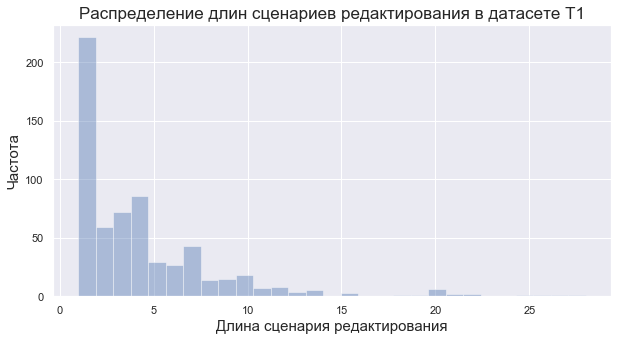

In [112]:
plt.figure(figsize=(10,5))
ax = sns.distplot(lens, bins=29, kde=False)
ax.set_title("Распределение длин сценариев редактирования в датасете T1", fontsize=17)
ax.set_xlabel("Длина сценария редактирования", fontsize=15)
ax.set_ylabel("Частота", fontsize=15)


In [16]:
arr = np.zeros(20)
arr[3] = 5
arr[4] = 20
arr[5] = 1

arr[14] = 3
arr[15] = 3
arr[16] = 3
arr[17] = 3
arr[18] = 3

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

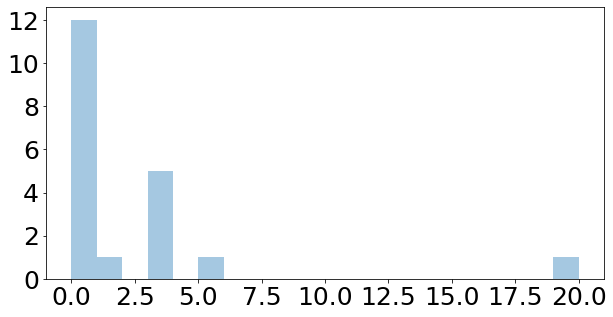

In [23]:
plt.figure(figsize=(10,5))
ax = sns.distplot(arr, bins=20, kde=False)
#ax.set_title("Распределение длин сценариев редактирования в датасете T1", fontsize=17)
#ax.set_xlabel("Длина сценария редактирования", fontsize=15)
#ax.set_ylabel("Частота", fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

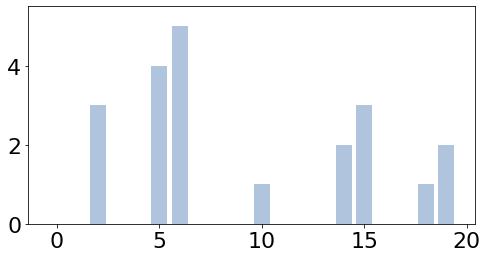

In [59]:
NUM = 20

arr = np.zeros(NUM)

arr[6] = 5
arr[5] = 4
arr[2] = 3
arr[14] = 2
arr[15] = 3
arr[18] = 1
arr[19] = 2
arr[10] = 1

plt.figure(figsize=(8,4))
plt.bar(np.arange(0, NUM), arr, color='lightsteelblue')
plt.xticks(range(0, 25, 5))
plt.yticks(range(0, 6, 2))

plt.ylim(0, 5.5)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

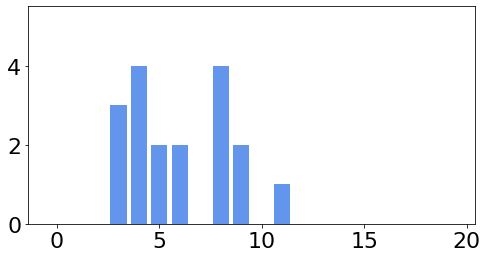

In [60]:
NUM = 20

arr = np.zeros(NUM)

arr[6] = 2
arr[4] = 4
arr[3] = 3
arr[5] = 2
arr[8] = 4
arr[9] = 2
arr[11] = 1

plt.figure(figsize=(8,4))
plt.bar(np.arange(0, NUM), arr, color='cornflowerblue')
plt.xticks(range(0, 25, 5))
plt.yticks(range(0, 6, 2))

plt.ylim(0, 5.5)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

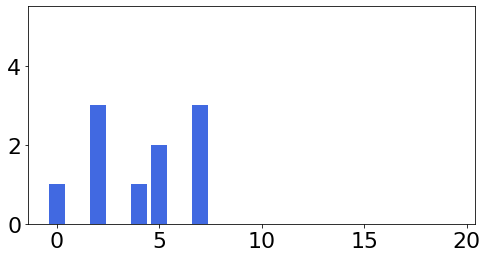

In [61]:
NUM = 20

arr = np.zeros(NUM)

arr[0] = 1
arr[2] = 3
arr[4] = 1
arr[5] = 2
arr[7] = 3

plt.figure(figsize=(8,4))
plt.bar(np.arange(0, NUM), arr, color='royalblue')
plt.xticks(range(0, 25, 5))
plt.yticks(range(0, 6, 2))

plt.ylim(0, 5.5)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

In [79]:
lens

array([  0., 221.,  59.,  72.,  86.,  29.,  27.,  43.,  14.,  15.,  18.,
         7.,   8.,   4.,   5.,   3.,   0.,   0.,   1.,   1.,   6.,   2.,
         2.,   0.,   0.,   1.,   1.,   1.,   1.])

Text(0, 0.5, 'Частота')

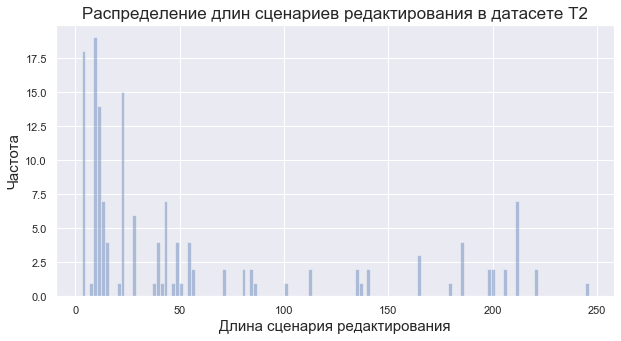

In [205]:
plt.figure(figsize=(10,5))
ax = sns.distplot(lens, bins=130, kde=False)
ax.set_title("Распределение длин сценариев редактирования в датасете T2", fontsize=17)
ax.set_xlabel("Длина сценария редактирования", fontsize=15)
ax.set_ylabel("Частота", fontsize=15)


In [170]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

flatten = lambda l: [item for sublist in l for item in sublist]


def drawhist2(some_changes, metrics, lines=False, lw=0.1, provided_lines_pos=None, title="Distance Matrix"):
    # make these smaller to increase the resolution
    dx, dy = 1, 1

    # generate 2 2d grids for the x & y bounds
    y, x = np.mgrid[slice(0, len(some_changes)+1, dy),
                    slice(0, len(some_changes)+1, dx)]

    #z = 10 * (np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x))
    z = np.array(metrics)
    
    #print(y.shape)
    #print(x.shape)
    #print(z.shape)

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    #z = z[:-1, :-1]
    flatten_z = z.flatten()
    levels = MaxNLocator(nbins=15).tick_values(flatten_z.min(), flatten_z.max())


    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('PiYG')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    fig, ax0 = plt.subplots(nrows=1, figsize=(12, 9))

    im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm, zorder=-1)


    cb = fig.colorbar(im, ax=ax0)
    ax0.set_title(title, fontsize=30)
    
    imaxes = plt.gca()
    plt.axes(cb.ax)
    plt.yticks(fontsize=25)
    plt.axes(imaxes)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)


    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    EPS = 0.00
    n = len(some_changes)
    
    if (lines):
        i = 0
        common_sum = 0

        while (i < n):
            j = i
            while j < n and (some_changes[i][0], some_changes[i][1]) == (some_changes[j][0], some_changes[j][1]):
                j += 1
            common_sum += (j - i)
            ax0.axvline(x=common_sum - EPS, lw=lw, c='black', zorder=15)
            ax0.axhline(y=common_sum, lw=lw, c='black', zorder=15)
            i = j
            
    if provided_lines_pos is not None:
        for pos in provided_lines_pos:
            ax0.axvline(x=pos - EPS, lw=lw, c='black', zorder=15)
            ax0.axhline(y=pos, lw=lw, c='black', zorder=15)
        
    #print(common_sum)
    
    plt.ylim((0, n))
    plt.xlim((0, n))
    
    plt.show()

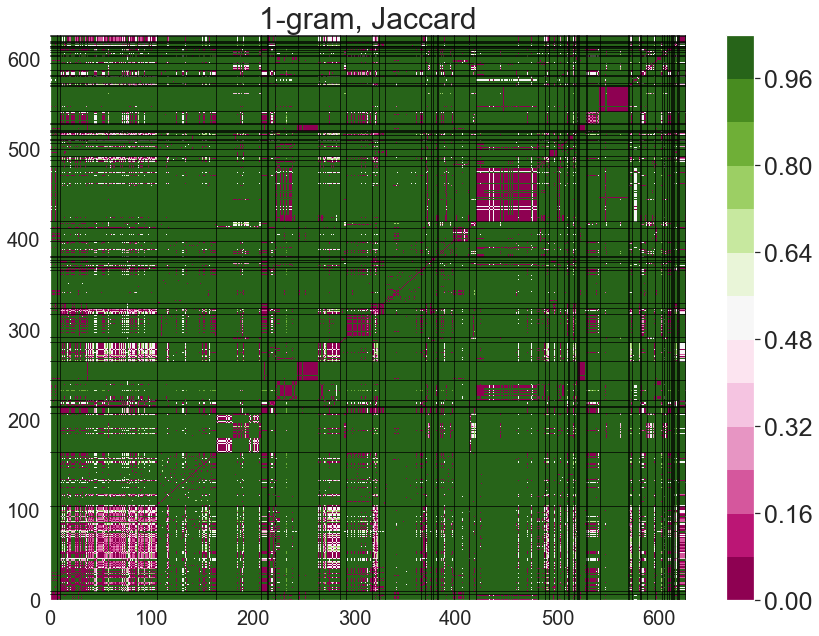

In [171]:
dists = get_dists(hists_tufano_1gram, jaccard_metric, hist_len_1gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-gram, Jaccard")

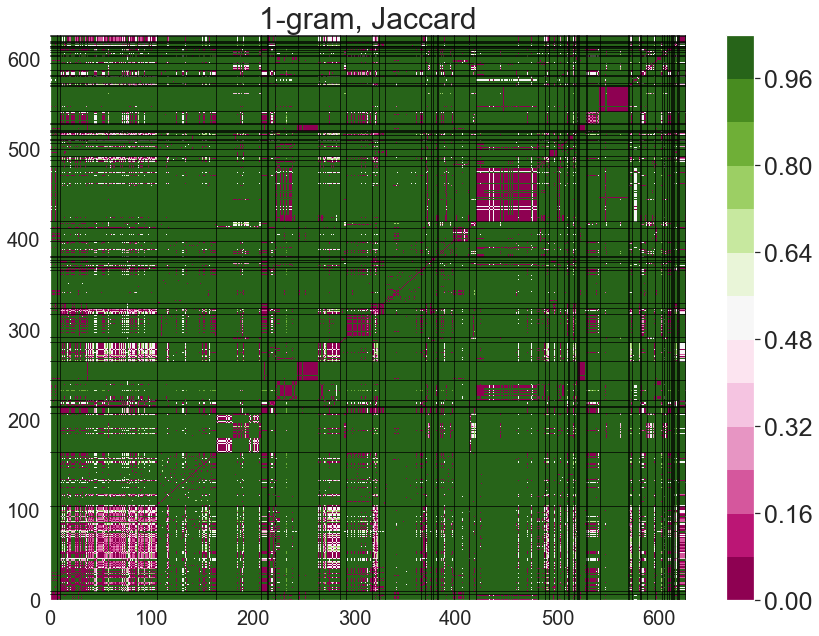

In [172]:
dists = get_dists(hists_tufano_1gram, jaccard_metric, hist_len_1gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-gram, Jaccard")

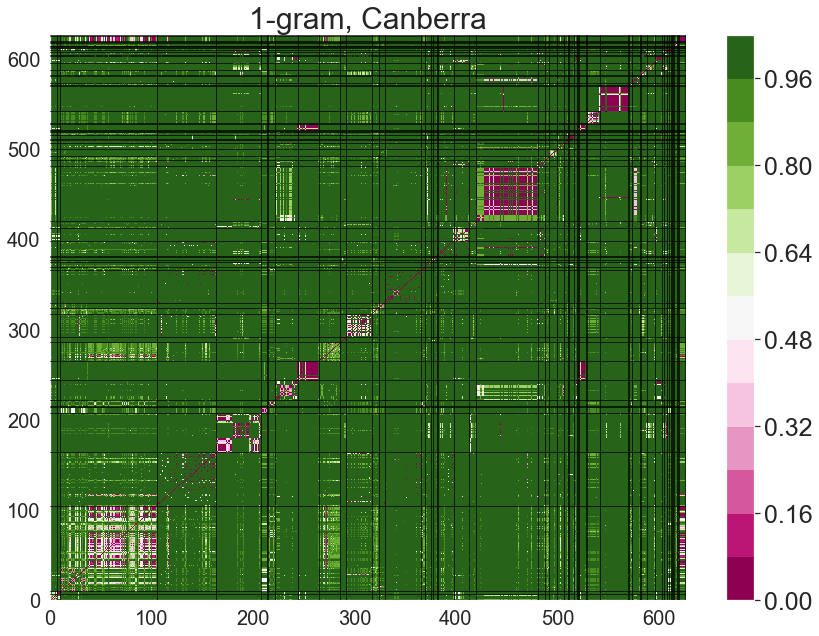

In [173]:
dists = get_dists(hists_tufano_1gram, canberra_metric, hist_len_1gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-gram, Canberra")

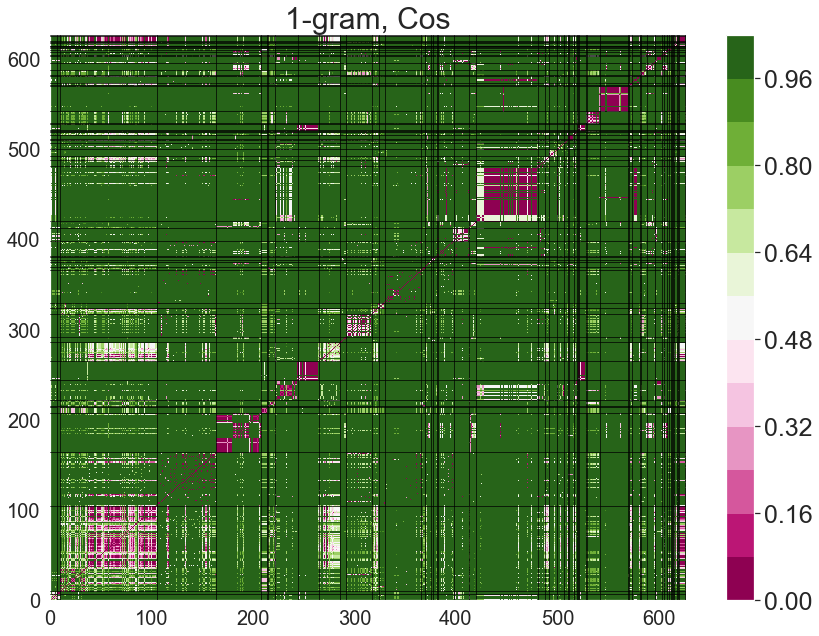

In [174]:
dists = get_dists(hists_tufano_1gram, cos_distance, hist_len_1gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-gram, Cos")

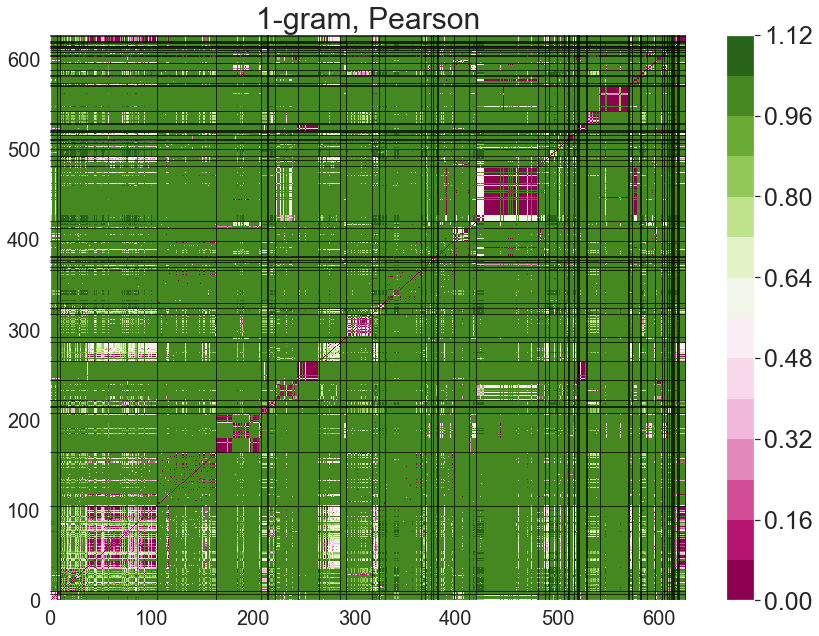

In [175]:
dists = get_dists(hists_tufano_1gram, pearsons_correlation_mean, hist_len_1gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-gram, Pearson")

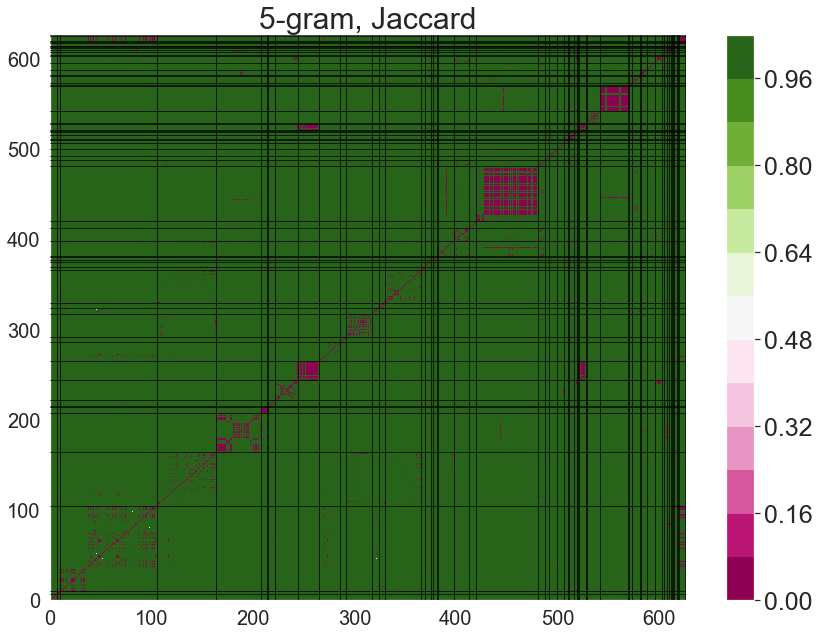

In [176]:
dists = get_dists(hists_tufano_5gram, jaccard_metric, hist_len_5gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="5-gram, Jaccard")

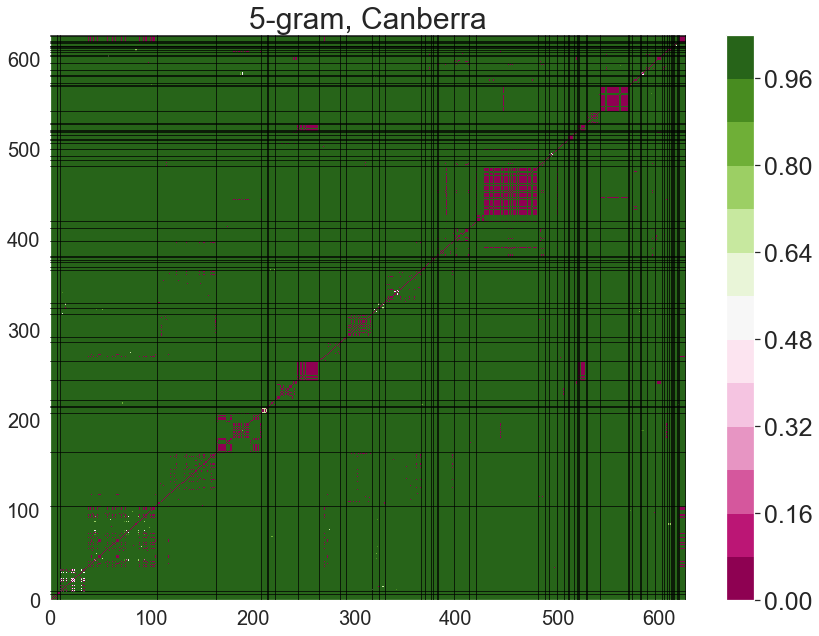

In [177]:
dists = get_dists(hists_tufano_5gram, canberra_metric, hist_len_5gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="5-gram, Canberra")

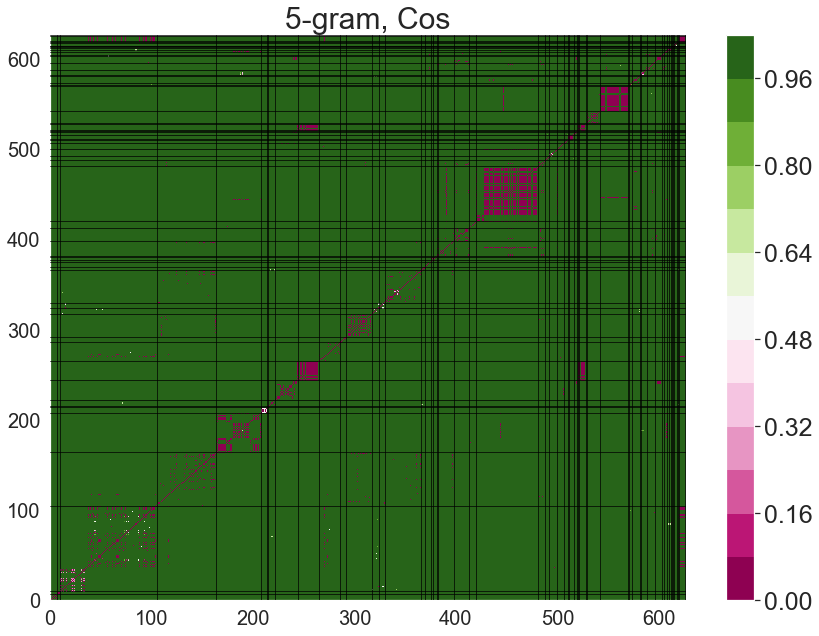

In [178]:
dists = get_dists(hists_tufano_5gram, cos_distance, hist_len_5gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="5-gram, Cos")

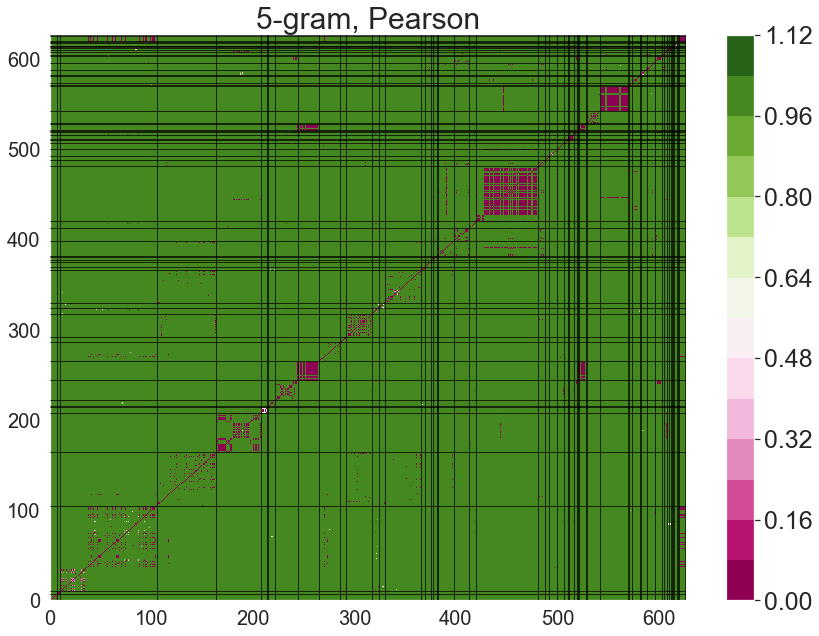

In [179]:
dists = get_dists(hists_tufano_5gram, pearsons_correlation_mean, hist_len_5gram_tufano)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="5-gram, Pearson")

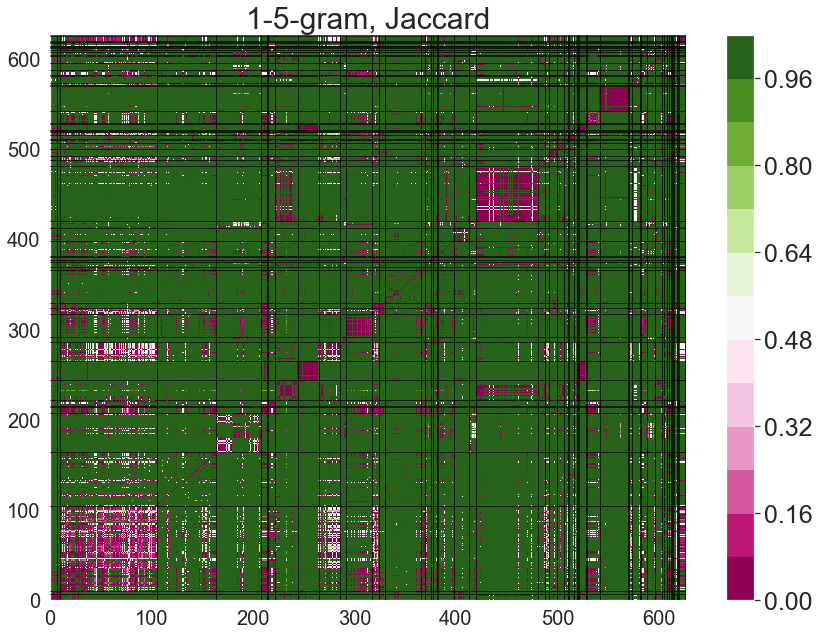

In [180]:
dists = get_dists(concat_hists_upd_5gram, jaccard_metric, concat_hists_upd_to_5gram_len)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-5-gram, Jaccard")

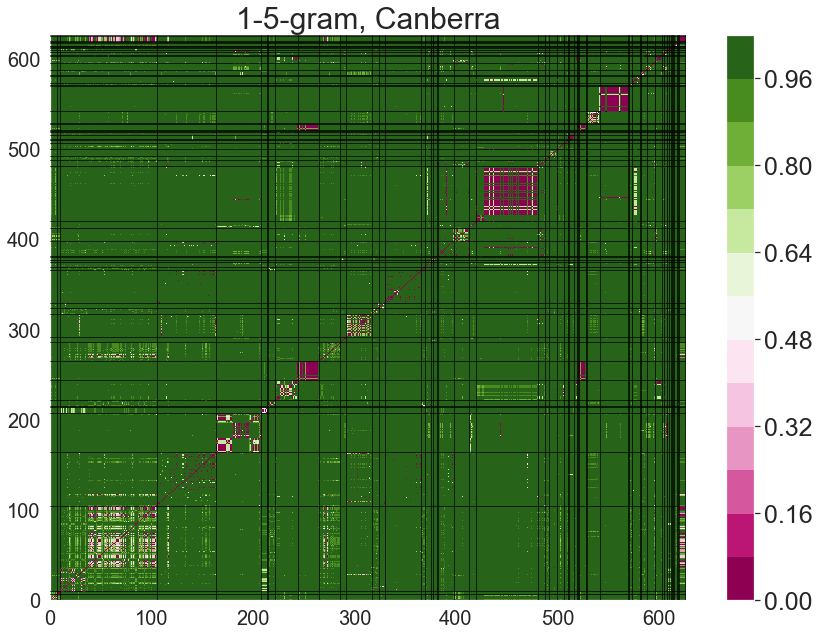

In [181]:
dists = get_dists(concat_hists_upd_5gram, canberra_metric, concat_hists_upd_to_5gram_len)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-5-gram, Canberra")

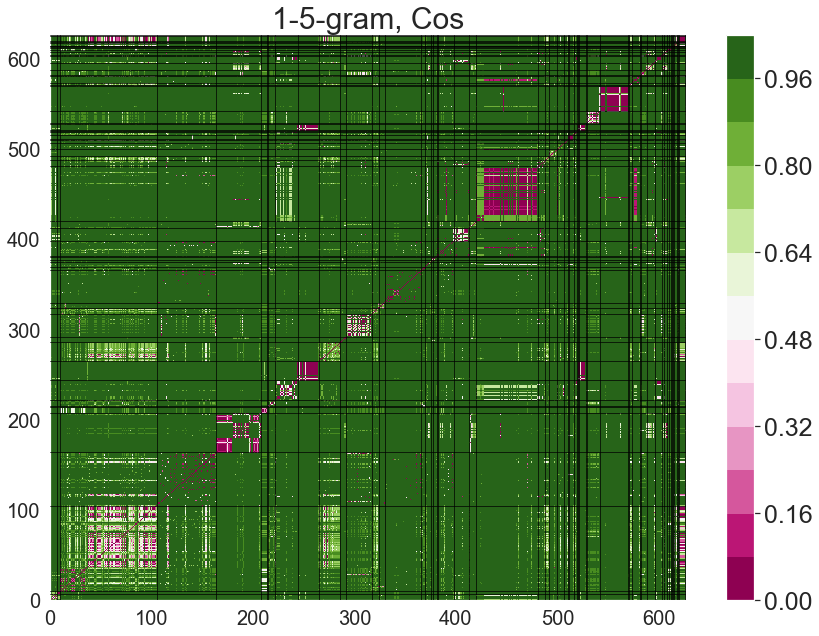

In [182]:
dists = get_dists(concat_hists_upd_5gram, cos_distance, concat_hists_upd_to_5gram_len)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-5-gram, Cos")

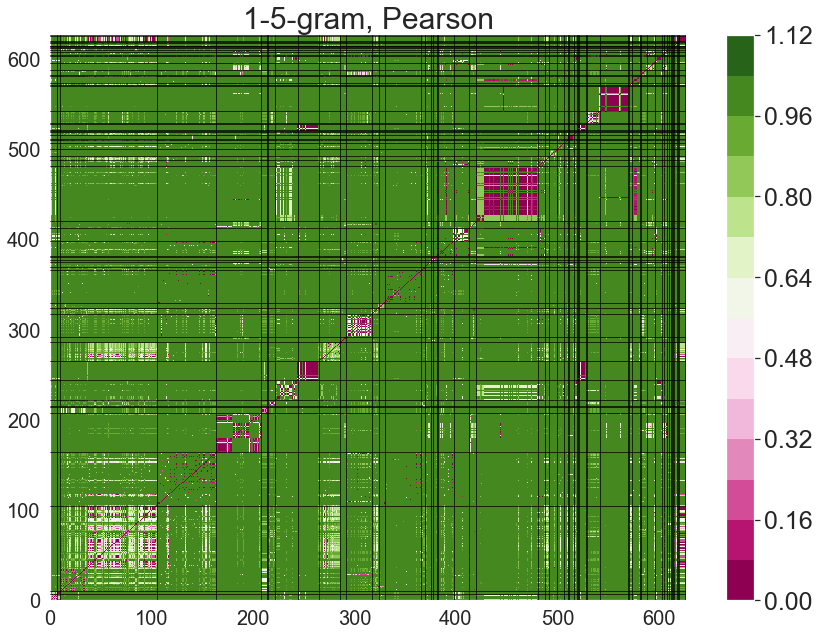

In [183]:
dists = get_dists(concat_hists_upd_5gram, pearsons_correlation_mean, concat_hists_upd_to_5gram_len)
drawhist2(ids_per_unique_label, dists, False, lw=0.7, provided_lines_pos=unique_lines_poses, 
          title="1-5-gram, Pearson")